In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sdwpf134_initial_kddcup.csv')

def get_date(k):
    cur_date = "2020-01-01"
    one_day = timedelta(days=k-1)
    return str(datetime.strptime(cur_date, '%Y-%m-%d') + one_day)[:10]

df['Day'] = df['Day'].apply(lambda x: get_date(x))

def cols_concat(df, con_list):
    name = 't1'
    df[name] = df[con_list[0]].astype(str)
    for item in con_list[1:]:
        df[name] = df[name] + ' ' + df[item].astype(str)
    return df

df = cols_concat(df, ["Day", "Tmstamp"])

df = df[['TurbID', 't1', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv']]
df['t1'] = pd.to_datetime(df['t1'])

In [9]:
from fbprophet import Prophet

cur_TurbID = 110
Prophet_df = df.loc[df['TurbID'] == cur_TurbID, ['t1', 'Patv']]
Prophet_df.columns = ['ds', 'y']
Prophet_df.index = range(len(Prophet_df))
Prophet_df['ds'] = pd.to_datetime(Prophet_df['ds'])

m = Prophet()
m.fit(Prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=4*24, freq = '15min')
forecast = m.predict(future)

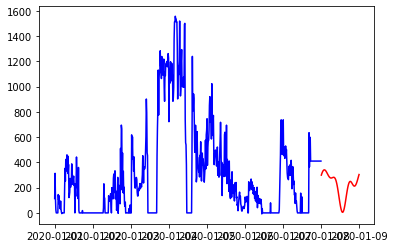

In [11]:
plt.plot(df.loc[df['TurbID'] == cur_TurbID, 't1'], df.loc[df['TurbID'] == cur_TurbID, 'Patv'], color = 'b')
plt.plot(forecast.loc[forecast['ds'] > '2020-01-07 23:45:00', 'ds'], forecast.loc[forecast['ds'] > '2020-01-07 23:45:00', 'yhat'], color = 'r')